In [ ]:
import pandas as pd
# Load the dataset into a DataFrame

df = pd.read_csv('/content/Cardiotocographic.csv')

df.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [ ]:

# Handle missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [ ]:
#calculating mean for all columns
mean_values=df.mean()

#replacing null values with mean

for column in df.columns:
  df[column].fillna(mean_values[column],inplace=True)

In [ ]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [ ]:
 df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.214328,0.004370,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734356,42.719161,0.642424,0.641426
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


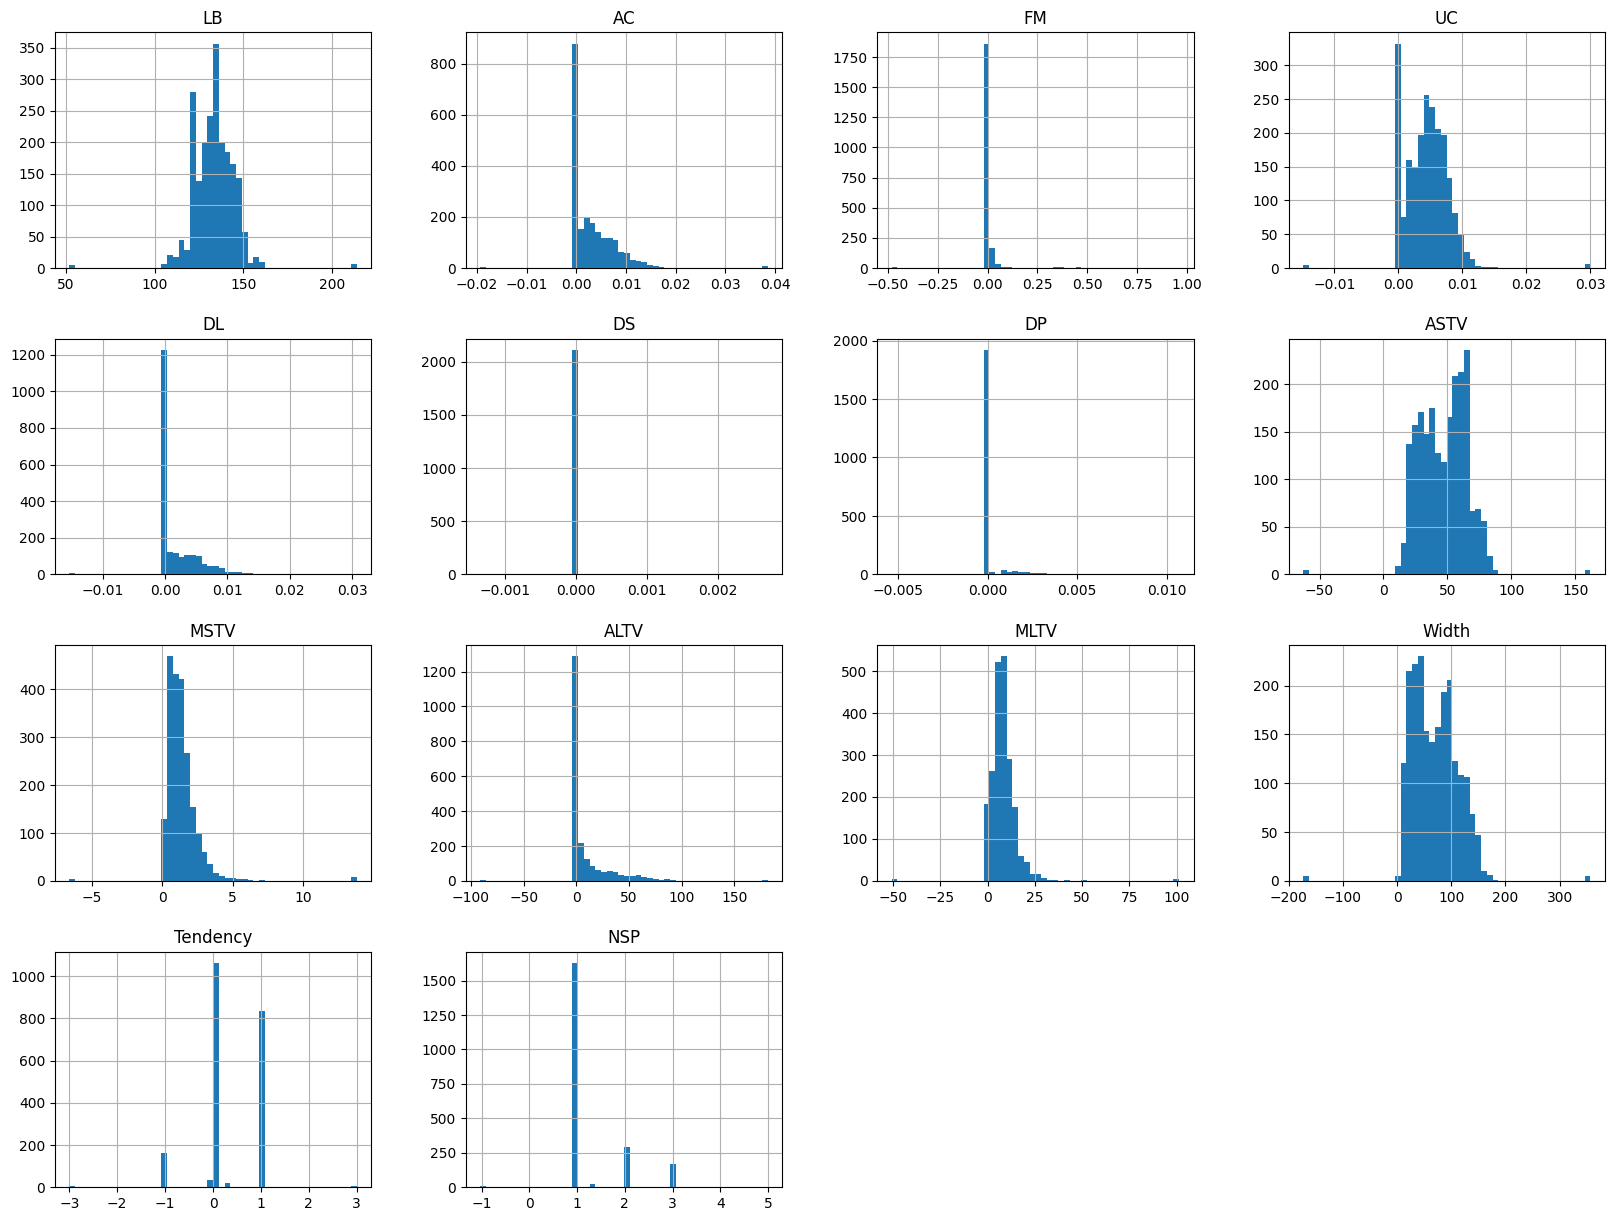

In [ ]:
 import matplotlib.pyplot as plt
 df.hist(bins=50, figsize=(20,15))
 plt.show()

Here we can see that most of  columns are poisitive skewed, which means that their mean is greater then median and we will have exterme postitve outliers

In [ ]:
 mean_values=df.mean()
 median_values=df.median()

 mean_median_df =pd.DataFrame({'Mean':mean_values,'Median':median_values})
 mean_median_df


,Mean,Median
LB,133.343598,133.000000
AC,0.003219,0.001668
FM,0.009894,0.000000
UC,0.004391,0.004484
DL,0.001895,0.000000
DS,0.000003,0.000000
DP,0.000175,0.000000
ASTV,46.995984,49.000000
MSTV,1.364378,1.200000
ALTV,10.285964,0.000000


Above data supports our insight that we got from hist of the df,most of the data is positive skewed


In [ ]:
 import numpy as np



# Compute the correlation matrix
 correlation_matrix = df.corr()

# Extract the highest correlation (excluding diagonal)
 highest_corr = (correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1)
                                        .astype(bool))
                                        .stack()
                                        .idxmax())

# Extract the lowest correlation (excluding diagonal)
 lowest_corr = (correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1)
                                        .astype(bool))
                                        .stack()
                                        .idxmin())

# Print the results
 print("Columns with the highest correlation:", highest_corr[0], "and", highest_corr[1], "with correlation", correlation_matrix.loc[highest_corr[0], highest_corr[1]])
 print("Columns with the lowest correlation:", lowest_corr[0], "and", lowest_corr[1], "with correlation", correlation_matrix.loc[lowest_corr[0], lowest_corr[1]])

Columns with the highest correlation: MSTV and Width with correlation 0.4330639321544326
Columns with the lowest correlation: ALTV and Width with correlation -0.34599707599853585


In [ ]:
 df.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.062839,0.018776,-0.166201,-0.126536,-0.005438,-0.047724,0.241857,-0.169561,0.210446,-0.003457,-0.118425,0.236864,0.131843
AC,-0.062839,1.000000,0.009432,0.071863,-0.093196,-0.033101,-0.083277,-0.230439,0.133649,-0.271041,-0.104875,0.234735,0.031977,-0.312022
FM,0.018776,0.009432,1.000000,-0.053226,0.009718,0.029899,0.121274,-0.032691,0.017055,-0.011936,-0.006237,0.097204,-0.018338,0.074048
UC,-0.166201,0.071863,-0.053226,1.000000,0.190128,-0.006922,0.070501,-0.181161,0.189406,-0.227304,-0.049351,0.107159,-0.066463,-0.185001
DL,-0.126536,-0.093196,0.009718,0.190128,1.000000,0.058430,0.144940,-0.069361,0.410102,-0.186967,-0.165198,0.408664,-0.023490,0.025342
DS,-0.005438,-0.033101,0.029899,-0.006922,0.058430,1.000000,0.004285,0.008425,0.016077,-0.004392,0.034349,0.040832,-0.015398,0.065400
DP,-0.047724,-0.083277,0.121274,0.070501,0.144940,0.004285,1.000000,0.038117,0.119250,-0.077654,-0.114084,0.175340,-0.130395,0.294472
ASTV,0.241857,-0.230439,-0.032691,-0.181161,-0.069361,0.008425,0.038117,1.000000,-0.293882,0.357497,-0.219728,-0.206942,-0.010892,0.421313
MSTV,-0.169561,0.133649,0.017055,0.189406,0.410102,0.016077,0.119250,-0.293882,1.000000,-0.291935,0.028779,0.433064,-0.036660,-0.094630
ALTV,0.210446,-0.271041,-0.011936,-0.227304,-0.186967,-0.004392,-0.077654,0.357497,-0.291935,1.000000,-0.107568,-0.345997,0.036722,0.365357


**Summary :**

1) Missing Values was handles by using mean and replacing it with the null values.

2) After the data was cleaned and ready we used hist to draw insight,using that we concluded that most of the data was positively skewed , meaning their mean was greater then median.

3) To support our insight we compared mean and median , which was positive.

4) For finding patterns,we wrote a code to find the max and min corr between data.

5) From which we can draw that when MSTV or width will increase other one will too,but we found that ALTV has the min corr with Width so hence we can draw that if MSTV or Width either is increases ALTV will be decreased